# Exploratory Machine Learning

In [85]:
%matplotlib inline

import numpy as np
import pandas as pd
# from scipy import stats
import pickle

import matplotlib.pyplot as plt

from sklearn import linear_model
# from sklearn.ensemble import RidgeRegressionRegressor

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle
# from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV

In [2]:
# import seaborn as sns
# sns.set()

In [86]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data

In [3]:
data_df= pd.read_csv('model_feats/data.csv')

In [4]:
feats_df= pd.read_csv('model_feats/feats.csv')
target_df= pd.read_csv('model_feats/target.csv')
# target= np.array(target_df).squeeze()
Npts= len(target_df)
print "Total number of data points: %d" % Npts
print "Total number of features: %d" % len(feats_df.columns)

Total number of data points: 4803
Total number of features: 35


In [5]:
county_df= target_df.loc[:,['County','Year']]
target_df= target_df['Rate (per 10k)']

In [6]:
target_df.head()

0    448.28
1    708.98
2    221.79
3    254.14
4     51.37
Name: Rate (per 10k), dtype: float64

In [7]:
feats_df.shape

(4803, 35)

In [8]:
feats_df.columns

Index([u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian',
       u'Hispanic', u'Other', u'Good AQI', u'Moderate AQI', u'Unhealthy AQI',
       u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Area burned percent', u'Foreign born (%)',
       u'Persons per household', u'Bachelor or higher (%)',
       u'Persons without health insurance (%)', u'Median household income',
       u'Persons in poverty (%)', u'Population per square mile',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Unemployment (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)',
       u'Other (%)', u'Radon Zone', u'Population near busy roads (%)'],
      dtype='object')

In [9]:
# cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
#        u'Good AQI', u'Moderate AQI', u'Unhealthy AQI', u'AQI Median',
#        u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
#        u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
#        u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
#        u'Foreign born (%)', u'Persons per household', u'Population per square mile',
#        u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
#        u'Median household income', u'Unemployment (%)', u'Persons in poverty (%)', u'Bachelor or higher (%)']

In [10]:
cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
       u'AQI Median',
       u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
       u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Foreign born (%)', u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
       u'Median household income', u'Unemployment (%)']

In [11]:
feats_df= feats_df.reindex(columns=cols)

In [12]:
feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
0,1,0,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
1,1,1,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
2,0,0,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
3,0,1,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
4,1,0,0,0,1,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7


In [13]:
feats_df.describe()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
count,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,0.463877,0.545909,0.325005,0.159900,0.107016,0.264210,0.143868,55.566729,0.000432,0.049768,...,23.474308,2.939176,1451.890589,12.996898,14.964179,47.176267,26.536519,11.322178,62613.702686,12.126775
std,0.498745,0.497940,0.468426,0.366552,0.309166,0.440957,0.350993,18.378100,0.002461,0.060327,...,7.834912,0.299193,3373.429267,2.753600,6.370198,11.289317,8.811652,3.887164,15834.940186,3.153034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,...,4.500000,2.230000,1.800000,8.400000,8.870000,17.630000,12.310000,4.550000,35578.000000,7.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,0.002740,...,20.300000,2.760000,126.500000,10.300000,11.040000,39.740000,20.600000,9.390000,50125.000000,10.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.030137,...,22.500000,2.950000,344.200000,13.200000,13.150000,47.100000,26.490000,10.660000,56603.000000,11.300000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,67.000000,0.000000,0.068681,...,30.500000,3.170000,1465.200000,14.900000,17.150000,53.490000,32.040000,12.850000,75619.000000,14.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,107.000000,0.032877,0.328729,...,37.700000,3.610000,17179.100000,17.400000,48.460000,70.000000,59.570000,22.710000,96310.000000,28.200000


Normalize Data via a robust scaler

In [14]:
scaler= RobustScaler()

scale_feats_df= scaler.fit_transform(feats_df)
scale_feats_df= pd.DataFrame(data=scale_feats_df,index=feats_df.index,columns=feats_df.columns)

In [15]:
scale_feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
2,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
4,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364


In [21]:
# import pickle

# fout= open('scaler.pkl','wb')

# pickle.dump(scaler,fout,2)

# Ridge Regression Regressor

In [16]:
new_feats_df, new_target_df= shuffle(scale_feats_df, target_df, random_state=2)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(new_feats_df, new_target_df, train_size=0.75, random_state=2)

In [19]:
model = linear_model.Ridge(random_state=2)
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Check the model on the test set

In [20]:
R2_train= model.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.525848
R^2 on test set= 0.605955
RMSE on training= 103.238241
RMSE on test set= 90.913978


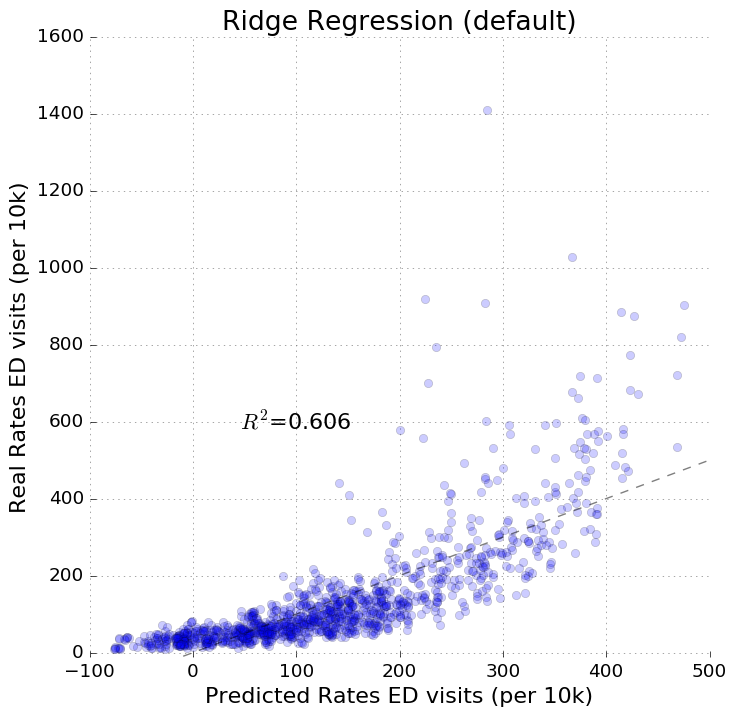

In [25]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Ridge Regression (default)')
plt.ylim(ymin=-10)

line= r'$R^2$=%.3f' % R2_test
plt.text(100,600,line,va='center',ha='center')
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('RidgeRegression_Default.png')

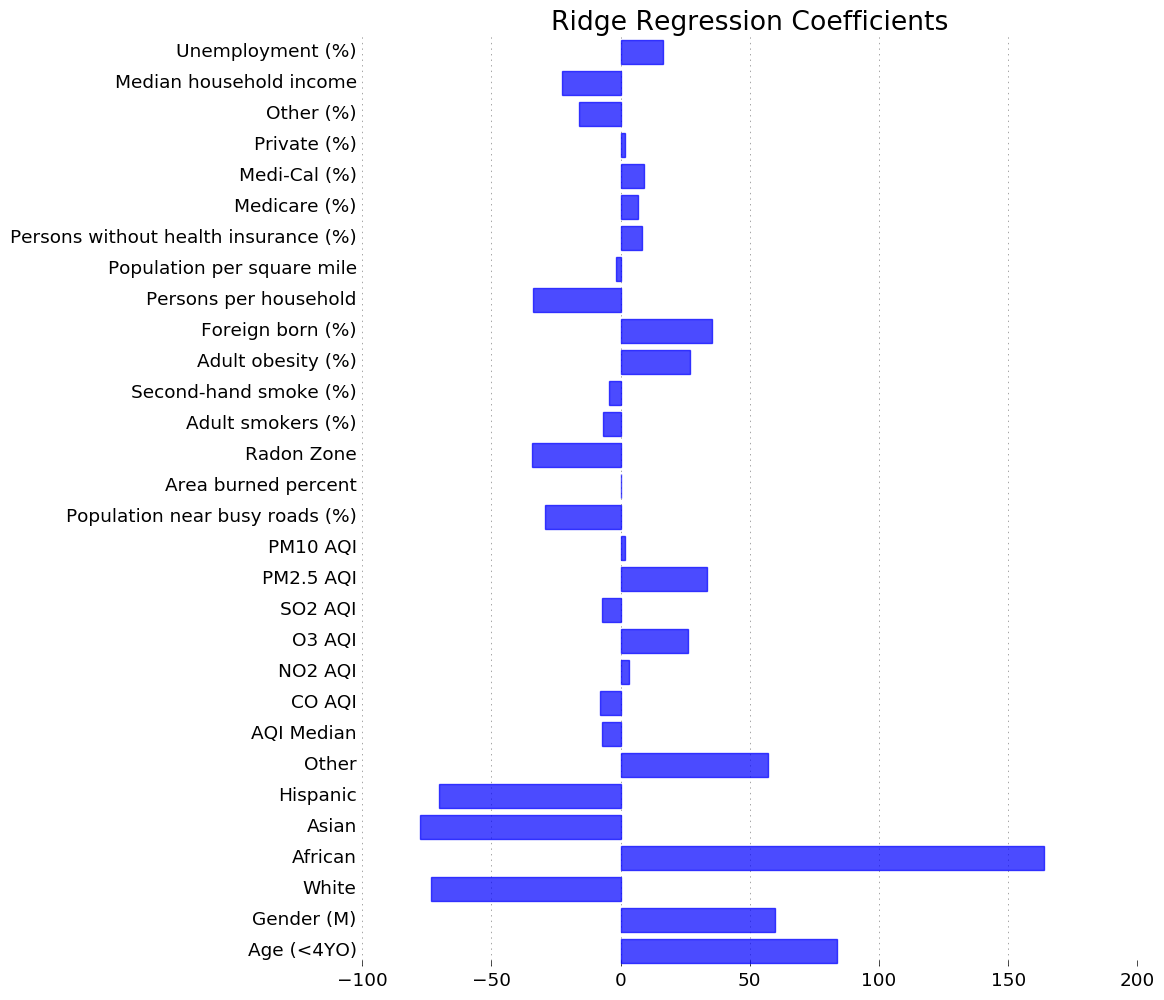

In [28]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(model.coef_)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, model.coef_, height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,scale_feats_df.columns)
plt.title('Ridge Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')
# xmin,xmax= plt.xlim()
# ax.hlines(indsPLT,xmin,xmax,colors='0.75',linestyles=':')

plt.savefig('RidgeRegression_Default_coeff.png')

Check the model on a cross-validation

In [29]:
model_cv= linear_model.Ridge(random_state=2)

In [30]:
cv= cross_val_score(model_cv,X_train,y_train,cv=10)

In [31]:
cv.mean(),cv.std()

(0.52284748296476935, 0.038546661408527021)

In [32]:
model_cv.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=2, solver='auto', tol=0.001)

In [33]:
model_cv.score(X_test,y_test)

0.60595510692203236

### Tune hyperparameters

In [34]:
Nfeats= len(X_train.columns)
print Nfeats

30


In [35]:
linear_model.Ridge?

In [38]:
model_cv.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': 2,
 'solver': 'auto',
 'tol': 0.001}

In [78]:
param_dist = {"alpha": np.logspace(-4,3,100)}

Randomized Search for best parameters

In [79]:
rnd= RandomizedSearchCV(linear_model.Ridge(),param_distributions=param_dist, cv=10, n_iter=100)

In [80]:
rnd.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': array([  1.00000e-04,   1.17681e-04, ...,   8.49753e+02,   1.00000e+03])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [81]:
rnd.best_params_

{'alpha': 0.0001}

In [82]:
model_rnd= rnd.best_estimator_

In [83]:
R2_train= model_rnd.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model_rnd.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model_rnd.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model_rnd.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.528430
R^2 on test set= 0.606272
RMSE on training= 102.956860
RMSE on test set= 90.877418


In [87]:
pickle.dump(model_rnd,open('model_RR.pkl','wb'),2)

Grid Search for best parameters

In [88]:
grid= GridSearchCV(linear_model.Ridge(),param_grid=param_dist,cv=10)

In [89]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.17681e-04, ...,   8.49753e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [90]:
grid.best_params_

{'alpha': 0.0001}

In [91]:
model_grid= grid.best_estimator_

In [97]:
R2_train= model_grid.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model_grid.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model_grid.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model_grid.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.528430
R^2 on test set= 0.606272
RMSE on training= 102.956860
RMSE on test set= 90.877418


### Plot of prediction vs. real

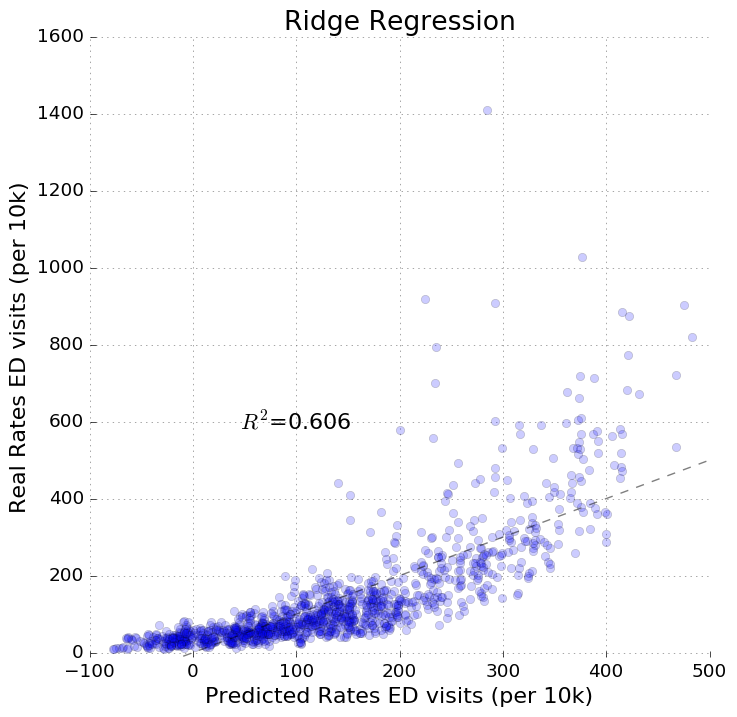

In [102]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Ridge Regression')

plt.ylim(ymin=-10)

line= r'$R^2$=%.3f' % R2_test
plt.text(100,600,line,va='center',ha='center')
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('RidgeRegression_CV.png')

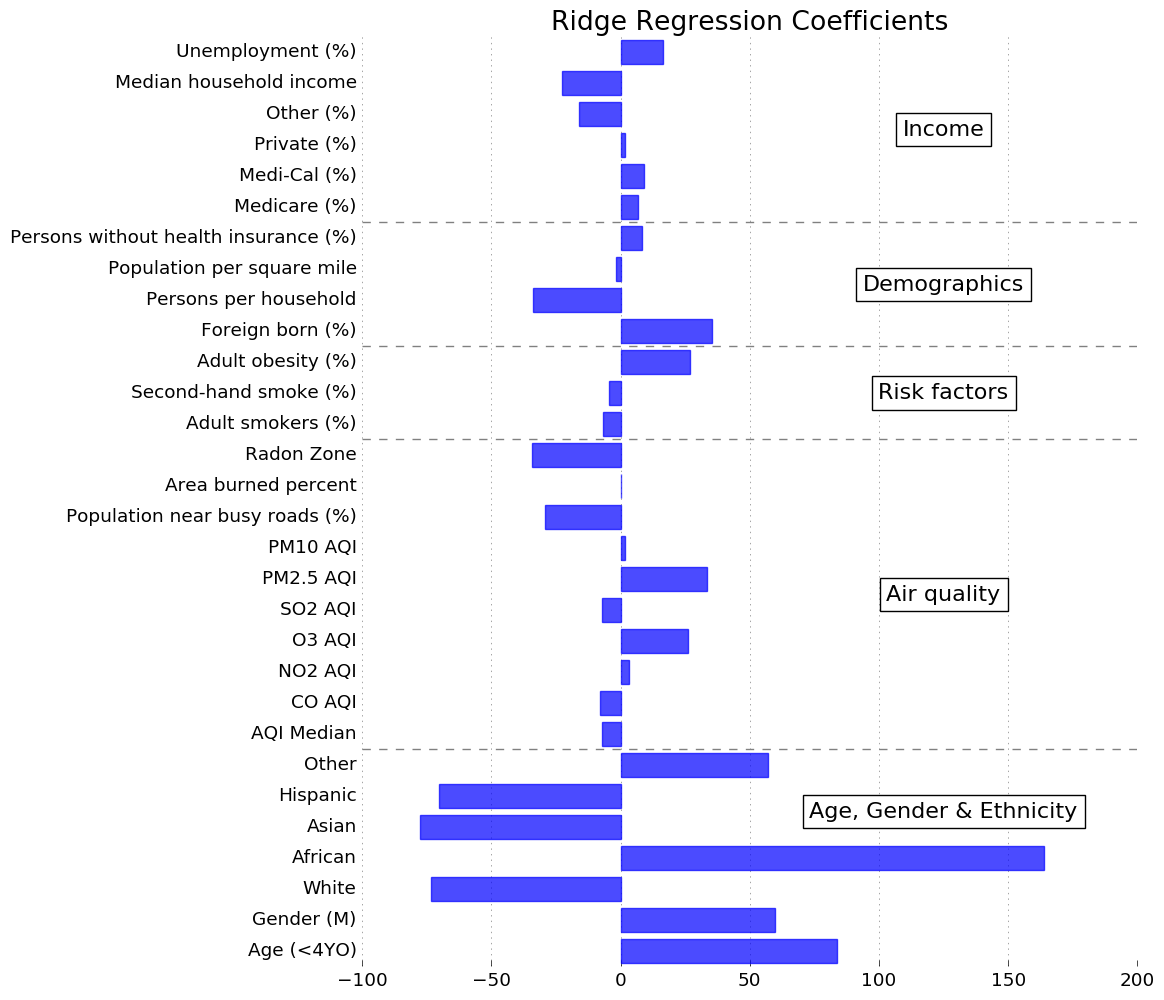

In [109]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(model_cv.coef_)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, model_cv.coef_, height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,scale_feats_df.columns)
plt.title('Ridge Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

xmin,xmax= plt.xlim()
ax.hlines([7,17,20,24],xmin,xmax,colors='0.5',linestyles='--')
plt.text(125,5,'Age, Gender & Ethnicity',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(125,12,'Air quality',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(125,18.5,'Risk factors',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(125,22,'Demographics',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(125,27,'Income',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.xlim(xmin,xmax)

plt.savefig('RidgeRegression_CV_coeff.png')